<a href="https://colab.research.google.com/github/cxbxmxcx/EvolutionaryDeepLearning/blob/main/EDL_4_5_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Source: https://github.com/DEAP/deap/blob/master/examples/ga/onemax_numpy.py

DEAP is free software: you can redistribute it and/or modify
   it under the terms of the GNU Lesser General Public License as
   published by the Free Software Foundation, either version 3 of
   the License, or (at your option) any later version.

   DEAP is distributed in the hope that it will be useful,
   but WITHOUT ANY WARRANTY; without even the implied warranty of
   MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
   GNU Lesser General Public License for more details.
   You should have received a copy of the GNU Lesser General Public
   License along with DEAP. If not, see <http://www.gnu.org/licenses/>.

In [ ]:
#@title Install DEAP
!pip install deap --quiet

In [ ]:
#@title Imports
import random
import array
import time

import numpy as np

from deap import base
from deap import benchmarks
from deap import creator
from deap import tools

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
#@title Hyperparameters
NDIM = 6
CR = 0.25
F = 1  
MU = 300
NGEN = 1000  
GEN_OUTPUT = 25
MAX_TIME = 5

In [ ]:
#@title Setup Fitness Criteria
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='d', fitness=creator.FitnessMin)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
#@title Add Genetic Operators to Toolbox
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -3, 3)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, NDIM)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("select", tools.selRandom, k=3)

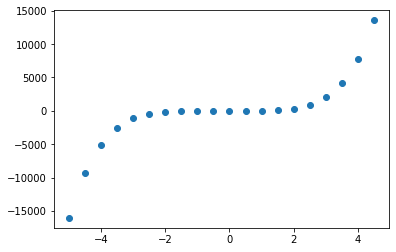

In [ ]:
#@title Generate regression data
equation_form = "polynomial" #@param ["polynomial", "abs", "step"]

X_START = -5
X_END = 5
X_STEP = 0.5

def equation(x):
  if equation_form == "polynomial":
    return (2*x + 3*x**2 + 4*x**3 + 5*x**4 + 6*x**5 + 10) 
  elif equation_form == "abs":    
    return abs(x)
  else:    
    return np.where(x>1, 1, 0)     

X = np.array([x for x in np.arange(X_START, X_END, X_STEP)])
Y = equation(X)
data = list(zip(X, Y))

plt.scatter(X,Y)

In [ ]:
import csv
with open('data.csv', 'w') as f:      
    # using csv.writer method from CSV package
    write = csv.writer(f)      
    write.writerows(data)

In [ ]:
#@title Evaluation of fitness
def pred(ind, x):    
  y_ = 0.0    
  for i in range(1,NDIM):
    y_ += ind[i-1]*x**i    
  y_ += ind[NDIM-1]       
  return y_

def fitness(ind, data):    
  mse = 0.0    
  for x, y in data:        
    y_ = pred(ind, x)
    mse += (y - y_)**2        
  return mse/len(data),

# fitness eval
toolbox.register("evaluate", fitness, data=data)

In [ ]:
#@title Plot Fitness
def plot_fitness(g, best, pop, logbook):
  Y_ = np.array([pred(best, x) for x in X])
  clear_output()
  print(f"Generation {g}, Best {best}") 
  print(logbook.stream)
  fits = [f.fitness.values[0] for f in pop]  
  plt.hist(fits)
  plt.show()
  plt.scatter(X,Y)
  plt.plot(X,Y_, 'r')
  plt.show()   

Generation 99, Best Individual('d', [-24.18388320965048, 4.8931361748926, 5.1003703100526625, 4.861666935729579, 6.011428837784546, 17.883332602151455])
75 	300  	57191.6    	3511.87    	64019.1    	371679     
76 	300  	54117.7    	3511.87    	62788.7    	333256     
77 	300  	52388.4    	3511.87    	60881.9    	333256     
78 	300  	52254.3    	2283.67    	60019.6    	333256     
79 	300  	51927.6    	2283.67    	59269.3    	333256     
80 	300  	50880.9    	2283.67    	57744.1    	333256     
81 	300  	50189.1    	2283.67    	56880.5    	321940     
82 	300  	50208.9    	2283.67    	56401.3    	321940     
83 	300  	48781.9    	2283.67    	55801      	321940     
84 	300  	48328.4    	2283.67    	55385.7    	321940     
85 	300  	47929.8    	2283.67    	54873.3    	321940     
86 	300  	47387.4    	2283.67    	54216      	321940     
87 	300  	47438.2    	1409.41    	53883.6    	321940     
88 	300  	47121.1    	1409.41    	53009.4    	321940     
89 	300  	46953      	1409.41    	5

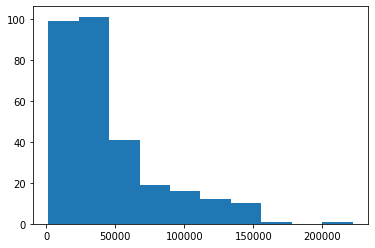

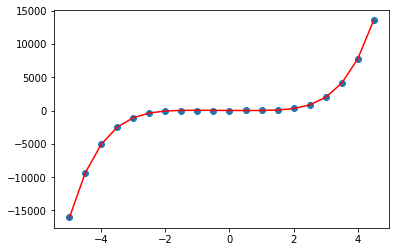

Best individual is  Individual('d', [-24.18388320965048, 4.8931361748926, 5.1003703100526625, 4.861666935729579, 6.011428837784546, 17.883332602151455]) 1409.412359942684


In [ ]:
pop = toolbox.population(n=MU);
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

logbook = tools.Logbook()
logbook.header = "gen", "evals", "std", "min", "avg", "max"

# Evaluate the individuals
fitnesses = toolbox.map(toolbox.evaluate, pop)
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

record = stats.compile(pop)
logbook.record(gen=0, evals=len(pop), **record)
print(logbook.stream)
start = time.time()
for g in range(1, NGEN):
  for k, agent in enumerate(pop):
    a,b,c = toolbox.select(pop)
    y = toolbox.clone(agent)
    index = random.randrange(NDIM)
    for i, value in enumerate(agent):
      if i == index or random.random() < CR:
        y[i] = a[i] + F*(b[i]-c[i])
    y.fitness.values = toolbox.evaluate(y)
    if y.fitness > agent.fitness:
      pop[k] = y            
  hof.update(pop)    
  record = stats.compile(pop)
  logbook.record(gen=g, evals=len(pop), **record)
  if (g+1) % GEN_OUTPUT == 0:
    plot_fitness(g, hof[0], pop, logbook) 
    end = time.time()
    if end-start > MAX_TIME:
      break

print("Best individual is ", hof[0], hof[0].fitness.values[0])
